In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from numpy.linalg import norm


Hopepr:
* semi-trained policy `/home/ignat/git/SHAC/scripts/outputs/2023-05-08/18-22-41/logs/shac/df_hopper/jacobians.npz`
* optimal policy `/home/ignat/git/SHAC/scripts/outputs/2023-05-08/22-32-09/logs/shac/df_hopper/best_policy.pt`
* jacobians `/home/ignat/git/SHAC/scripts/outputs/2023-05-08/18-22-41/logs/shac/df_hopper/jacobians.npz`

Cheetah:
* optimal policy `/home/ignat/git/SHAC/scripts/outputs/2023-05-10/12-46-54/logs/shac/df_cheetah/best_policy.pt`
* jacobians `/home/ignat/git/SHAC/scripts/outputs/2023-05-13/11-13-51/logs/shac/df_cheetah/jacobians.npz`

Ant:
* optimal policy `/home/ignat/git/SHAC/scripts/outputs/2023-05-10/12-33-29/logs/shac/df_ant/best_policy.pt`
* jacobians `/home/ignat/git/SHAC/scripts/outputs/2023-05-13/16-38-09/logs/shac/df_ant/jacobians.npz`

# Hopper

<IPython.core.display.Javascript object>


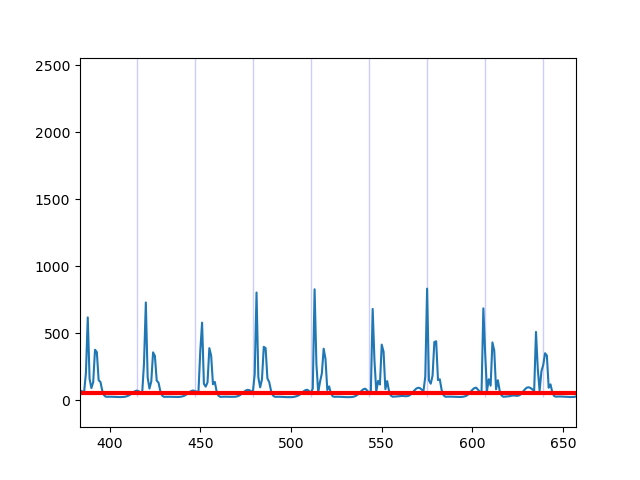

median 52.53721 std 178.38405
total truncations 1
total early 0
total ep ends 1


In [3]:
%matplotlib notebook

ax = plt.gca()

# hopper jacobians for many OK trained policies
hopper = np.load("/home/ignat/git/SHAC/scripts/outputs/2023-05-08/18-22-41/logs/shac/df_hopper/jacobians.npz", allow_pickle=True)

# converged policy for H=32
hopper = np.load("/home/ignat/git/SHAC/scripts/outputs/2023-05-10/12-27-03/logs/shac/df_hopper/jacobians.npz", allow_pickle=True)
jacs = hopper['jacobians']
contact_changes = hopper['contact_changes']
trunc = hopper['truncations']
early_stops = hopper['early_stops']
ends = hopper['episode_ends']

norms = norm(jacs, axis=(2,3))

for i in range(norms.shape[1]):
    ax.plot(norms[: ,i])
    
ax.plot(np.median(norms).repeat(len(norms)), linewidth=3, c='r')
print("median {:.5f} std {:.5f}".format(np.median(norms), np.std(norms)))

mi, ma = np.min(norms), np.max(norms)
ax.fill_between(np.arange(len(norms)), mi, ma, where=trunc.flatten(), color='g', alpha=0.2, label="trunc")
ax.fill_between(np.arange(len(norms)), mi, ma, where=early_stops.flatten(), color='r', alpha=0.2, label="early")
ax.fill_between(np.arange(len(norms)), mi, ma, where=ends.flatten(), color='purple', alpha=0.2, label="ends")
short_horizons = [False]*31 + [True]
short_horizons*=len(norms)//32
ax.fill_between(np.arange(len(norms)), mi, ma, where=short_horizons, color='blue', alpha=0.2, label="short horizons")


print("total truncations", trunc.sum())
print("total early", early_stops.sum())
print("total ep ends", ends.sum())

# Cheetah

<IPython.core.display.Javascript object>


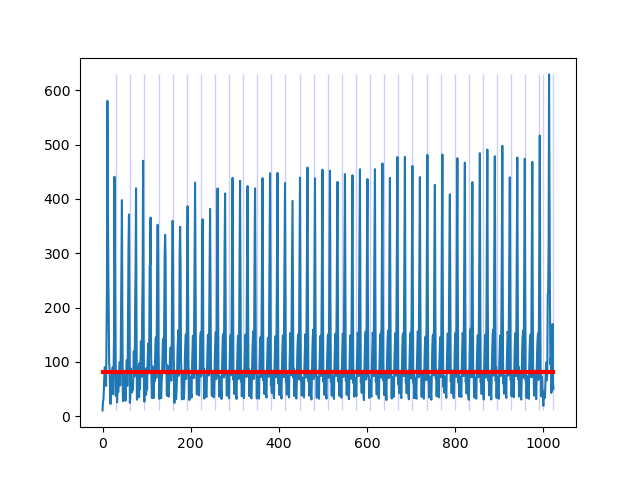

median 80.77976 std 109.61178
total truncations 1
total early 0
total ep ends 1


In [10]:
%matplotlib notebook

ax = plt.gca()

# hopper jacobians for many OK trained policies
hopper = np.load("/home/ignat/git/SHAC/scripts/outputs/2023-05-13/11-13-51/logs/shac/df_cheetah/jacobians.npz", allow_pickle=True)
jacs = hopper['jacobians']
contact_changes = hopper['contact_changes']
trunc = hopper['truncations']
early_stops = hopper['early_stops']
ends = hopper['episode_ends']

norms = norm(jacs, axis=(2,3))

# for i in range(norms.shape[1]):
#     ax.plot(norms[0 ,i])
i = 0
ax.plot(norms[:, i])
    
ax.plot(np.median(norms).repeat(len(norms)), linewidth=3, c='r')
print("median {:.5f} std {:.5f}".format(np.median(norms), np.std(norms)))

mi, ma = np.min(norms), np.max(norms)
# ax.fill_between(np.arange(len(norms)), mi, ma, where=trunc[:, i], color='g', alpha=0.2, label="trunc")
ax.fill_between(np.arange(len(norms)), mi, ma, where=early_stops[:, i], color='r', alpha=0.2, label="early")
ax.fill_between(np.arange(len(norms)), mi, ma, where=ends[:, i], color='purple', alpha=0.2, label="ends")
short_horizons = [False]*31 + [True]
short_horizons*=len(norms)//32
ax.fill_between(np.arange(len(norms)), mi, ma, where=short_horizons, color='blue', alpha=0.2, label="short horizons")


print("total truncations", trunc.sum())
print("total early", early_stops.sum())
print("total ep ends", ends.sum())

In [ ]:
# Ant

<IPython.core.display.Javascript object>


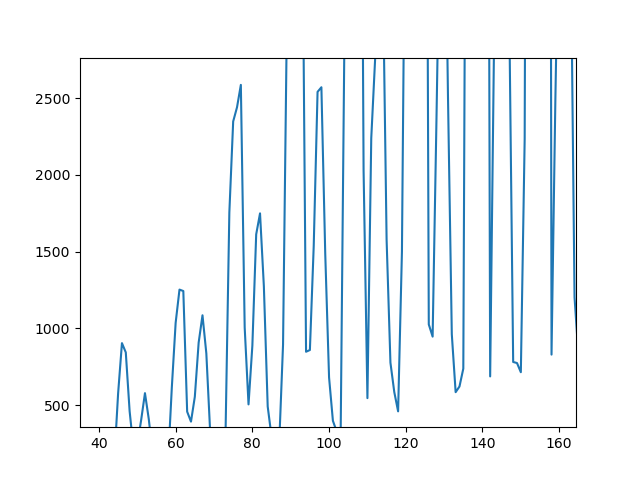

total truncations 1
total early 0
total ep ends 1


In [16]:
%matplotlib notebook

ax = plt.gca()

# hopper jacobians for many OK trained policies
hopper = np.load("/home/ignat/git/SHAC/scripts/outputs/2023-05-13/17-31-52/logs/shac/df_ant/jacobians.npz", allow_pickle=True)
jacs = hopper['jacobians']
contact_changes = hopper['contact_changes']
trunc = hopper['truncations']
early_stops = hopper['early_stops']
ends = hopper['episode_ends']

norms = norm(jacs, axis=(2,3))

# for i in range(norms.shape[1]):
#     ax.plot(norms[0 ,i])
i = 0
ax.plot(norms[:, i])

ax.set_ylim((-1, 10000))
    
# ax.plot(np.median(norms).repeat(len(norms)), linewidth=3, c='r')
# print("median {:.5f} std {:.5f}".format(np.median(norms), np.std(norms)))

# mi, ma = np.min(norms), np.max(norms)
# ax.fill_between(np.arange(len(norms)), mi, ma, where=trunc[:, i], color='g', alpha=0.2, label="trunc")
# ax.fill_between(np.arange(len(norms)), mi, ma, where=early_stops[:, i], color='r', alpha=0.2, label="early")
# ax.fill_between(np.arange(len(norms)), mi, ma, where=ends[:, i], color='purple', alpha=0.2, label="ends")
# short_horizons = [False]*31 + [True]
# short_horizons*=len(norms)//32
# ax.fill_between(np.arange(len(norms)), mi, ma, where=short_horizons, color='blue', alpha=0.2, label="short horizons")


print("total truncations", trunc.sum())
print("total early", early_stops.sum())
print("total ep ends", ends.sum())

In [14]:
np.max(norms)

nan